# Ensemble

Todo:

- Remove max evals here - it doesn't work
- Fix dates in plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json

from datetime import datetime, timedelta

from nb_utils import train_eval_plot_ensemble

In [10]:
with open('../config/sample_homogeneous_train_config.json') as f_train, \
    open('../config/sample_homogeneous_test_config.json') as f_test, \
    open('../config/sample_homogeneous_forecast_config.json') as f_forecast:
    default_train_config = json.load(f_train)
    default_test_config = json.load(f_test)
    default_forecast_config = json.load(f_forecast)

In [11]:
model_class = 'homogeneous_ensemble'
default_train_config['model_class'] = model_class
default_test_config['model_class'] = model_class
default_forecast_config['model_class'] = model_class

In [12]:
current_day = datetime.now().date() - timedelta(4) # Forecast starts from the day after current day
forecast_length = 30 # Length of forecast interval (days)

In [13]:
default_train_config

{'data_source': '',
 'region_name': [],
 'region_type': '',
 'train_start_date': '',
 'train_end_date': '',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD_gen',
   'model_parameters': {'incubation_period': 5,
    'latent_information': {'latent_variables': ['exposed', 'active'],
     'latent_on': 'confirmed'}}},
  'n': 50,
  'modes': {'training_mode': 'constituent_models',
   'predict_mode': 'mean_predictions'}},
 'search_space': {'r0': [0.5, 3],
  'exposed_ratio': [0.001, 10],
  'active_ratio': [0.001, 2],
  'infectious_period': [1, 10],
  'recovery_period': [1, 15],
  'deceased_period': [1, 15],
  'recovered_ratio': [0.7, 1],
  'beta': [0, 2]},
 'search_parameters': {'child_model': {'max_evals': 1000},
  'ensemble_model': {'max_evals': 100},
  'frac_for_child': 0.5},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {

### Inputs to train-eval-plot

In [14]:
region = 'pune'
region_type = 'district'

current_day = datetime.now().date() - timedelta(23)
forecast_length = 30

name_prefix = region

In [15]:
default_forecast_config

{'data_source': '',
 'region_name': [],
 'region_type': '',
 'run_day': '',
 'forecast_start_date': '',
 'forecast_end_date': '',
 'model_class': 'homogeneous_ensemble',
 'forecast_variables': ['confirmed', 'recovered', 'deceased'],
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}},
  'modes': {'training_mode': 'constituent_models',
   'predict_mode': 'mean_predictions'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 28.16604550441872,
     'F_fatalities': 0.02466701801276612,
     'F_hospitalization': 0.06963507606419204,
     'IbyCRatio': 1.4785269422997283,
     'infectious_period': 5.42824969419175,
     'r0': 2.0045875407735303,
     'LatentEbyCRatio': {'5/27/20': 28.16604550441872,
      '6/3/20': 1.6812382970858852},
     'LatentIbyCRatio': {'5/27/20': 1.4785269422997283,
      '6/3/20': 0.26879511010742685}

### Train eval plot

100%|██████████| 100/100 [00:15<00:00,  6.42trial/s, best loss: 2.516095505243463]
Best fit: {'beta': 1.97035124030684}
Best Loss: 2.516095505243463
t = 15.90
t = 15.90
100%|██████████| 100/100 [00:15<00:00,  6.59trial/s, best loss: 5.367816965725877]
Best fit: {'beta': 0.7032507083736446}
Best Loss: 5.367816965725877


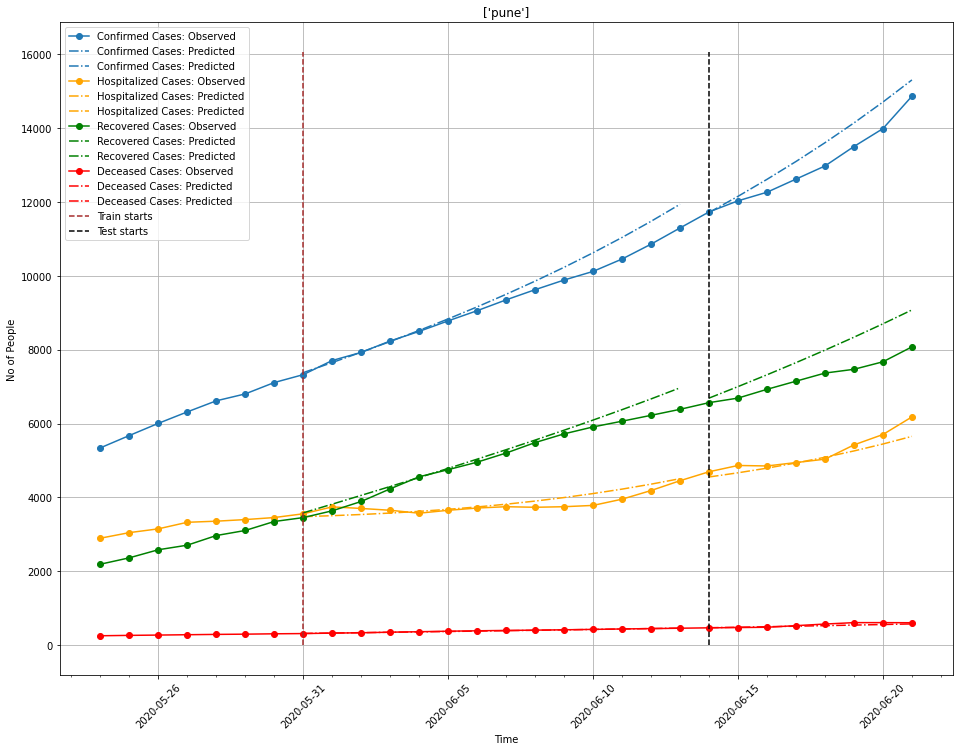

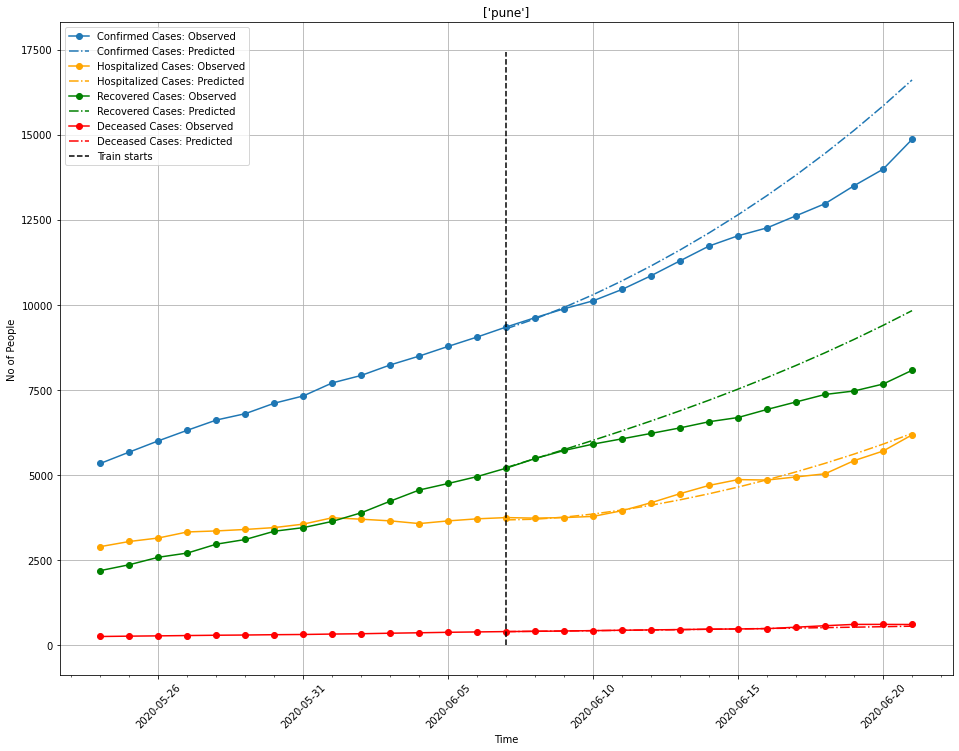

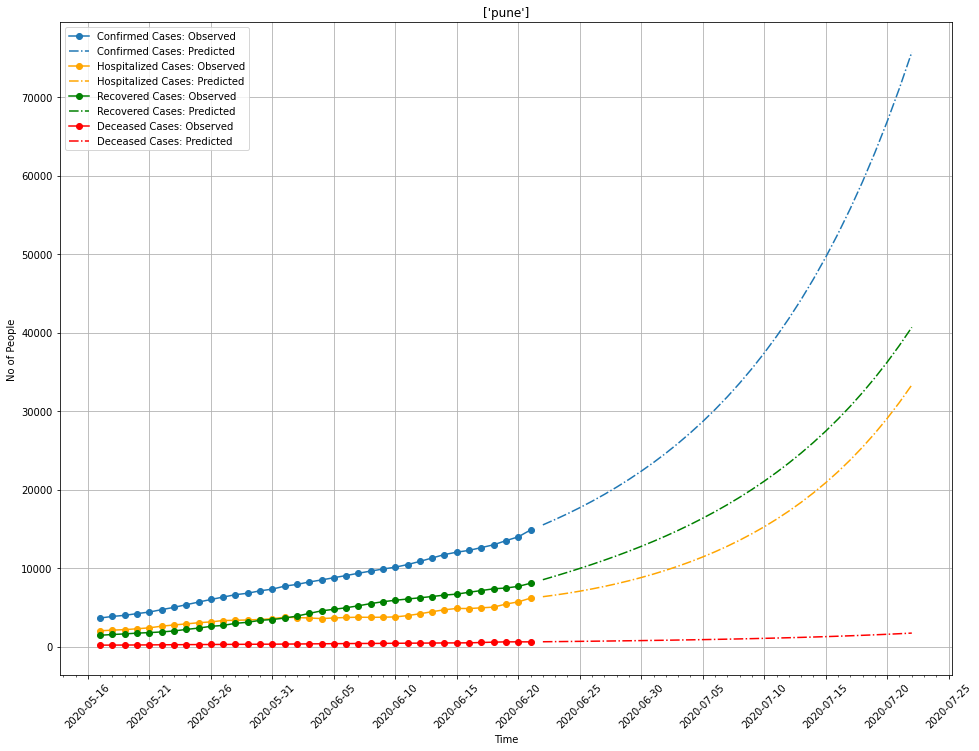

In [17]:
# remove max_evals here, it doesn't work
train_eval_plot_ensemble([region], region_type, 
                         current_day, forecast_length,
                         default_train_config, default_test_config, default_forecast_config,
                         train_period = 14, test_period = 7,
                         max_evals = 100, data_source = 'tracker_district_daily', 
                         mlflow_log = False, mlflow_run_name = "Ensemble testing")